# GDIT Challenge : Image Classification

In [405]:
#import the libraries:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from collections import OrderedDict
from torch import optim
import torchvision
from torchvision import datasets, models, transforms
from PIL import Image
import matplotlib.pyplot as plt

In [406]:
#trasnformation function:
transform = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])


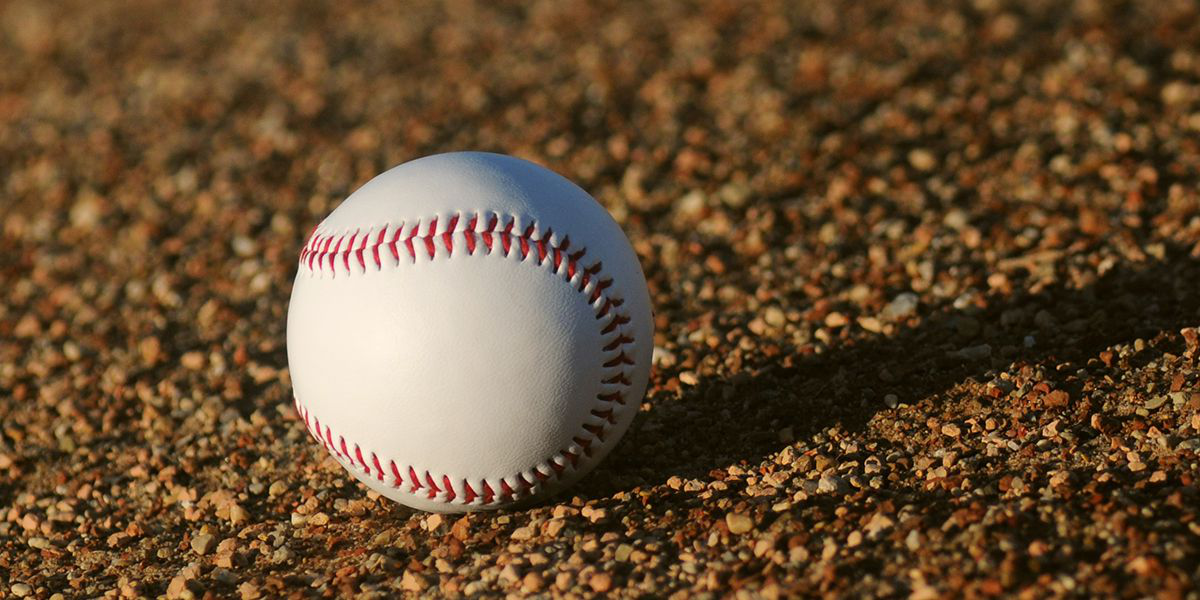

In [407]:
#Import image
img = Image.open("b1.jpg")
img

In [408]:
img_t = transform(img)
image = torch.unsqueeze(img_t, 0) 

In [409]:
image.shape

torch.Size([1, 3, 224, 224])

# Alexnet model:

In [410]:

#loead the trainer model:
model = models.alexnet(pretrained=True)
#stop model trainin using eval mode.
model.eval()
# carry out the inference.



AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [411]:
out = model(image)
print(out.shape)

torch.Size([1, 1000])


In [413]:
with open('imagenet_classes_main.txt') as f:
  classes = [line.strip() for line in f.readlines()]

In [414]:
pro, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:1]]

[('baseball', 99.70674133300781)]

# Make loop for all images:


## Behavior of model with balls' images:

In [415]:
data_dir = 'images/balls'
img_transform = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
data = datasets.ImageFolder(data_dir , transform=img_transform)

In [416]:
len(data)

32

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


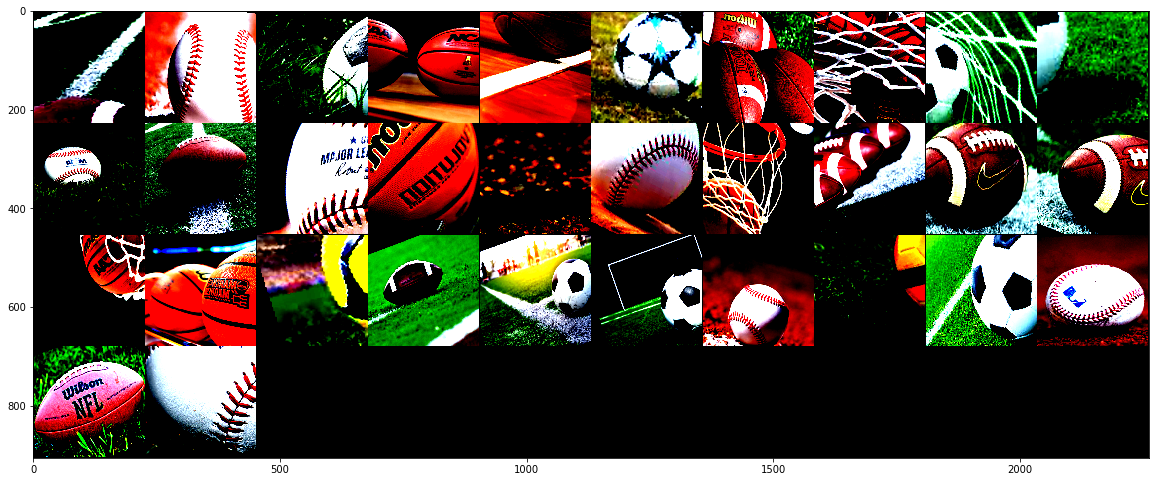

In [417]:
#print out the all images:
trainloader = torch.utils.data.DataLoader(data, batch_size=32, shuffle=True)
images, labels = next(iter(trainloader))

grid= torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(20,20))
plt.imshow(np.transpose(grid,(1,2,0))) 


0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


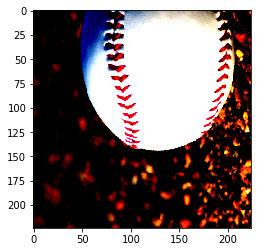

[('baseball', 99.65553283691406), ('ping-pong ball', 0.32915443181991577), ('golf ball', 0.010351303964853287), ('bottlecap', 0.003563463455066085), ('ruffed grouse, partridge, Bonasa umbellus', 0.0002060678816633299)]
1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


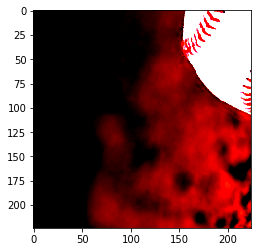

[('baseball', 96.24761199951172), ('golf ball', 1.929029107093811), ('rugby ball', 0.7072375416755676), ('soccer ball', 0.3931117355823517), ('ping-pong ball', 0.18030349910259247)]
2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


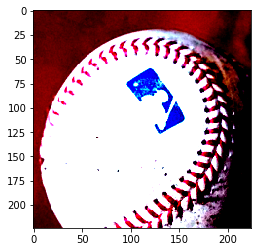

[('baseball', 99.99995422363281), ('bottlecap', 3.806970562436618e-05), ('ping-pong ball', 5.211295956542017e-06), ('rugby ball', 1.1752839554901584e-06), ('gong, tam-tam', 8.049762527662097e-07)]
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


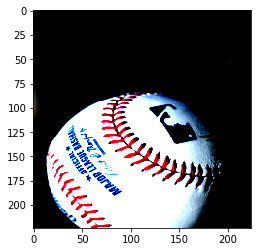

[('baseball', 99.99979400634766), ('soccer ball', 0.00012932185200043023), ('rugby ball', 2.136544389941264e-05), ('golf ball', 2.0547338863252662e-05), ('ping-pong ball', 2.0042132746311836e-05)]
4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


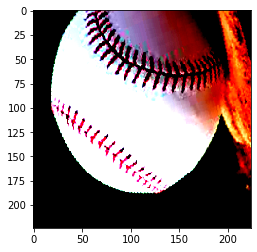

[('baseball', 100.0), ('ping-pong ball', 2.4931290809604434e-08), ("loupe, jeweler's loupe", 7.106728538985863e-10), ('bonnet, poke bonnet', 4.741412817921287e-10), ('rugby ball', 3.564807615763499e-10)]
5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


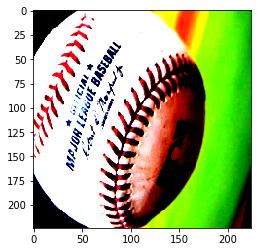

[('baseball', 99.99996185302734), ('rugby ball', 2.9143942811060697e-05), ('ping-pong ball', 4.216294200887205e-06), ('tennis ball', 3.0927305942896055e-06), ('soccer ball', 1.4147835827316158e-06)]
6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


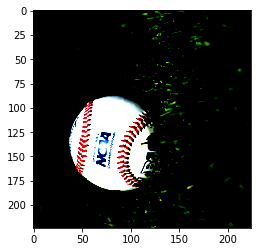

[('baseball', 99.70342254638672), ('soccer ball', 0.15117515623569489), ('golf ball', 0.10548614710569382), ('rugby ball', 0.021721141412854195), ('ping-pong ball', 0.01544388197362423)]
7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


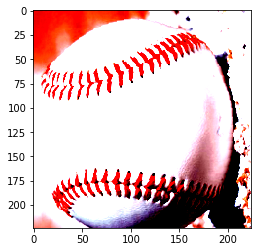

[('baseball', 100.0), ('hognose snake, puff adder, sand viper', 2.237660964965471e-06), ('coil, spiral, volute, whorl, helix', 1.3383645409703604e-06), ('bonnet, poke bonnet', 9.692903404356912e-07), ('ping-pong ball', 3.5078596738458145e-07)]
8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


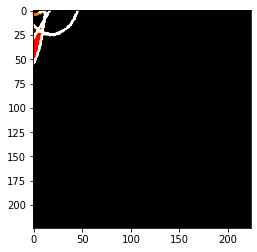

[('hummingbird', 6.962100505828857), ('horizontal bar, high bar', 4.787042140960693), ('hip, rose hip, rosehip', 3.516889810562134), ('flatworm, platyhelminth', 3.2817442417144775), ('trombone', 2.8532252311706543)]
9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


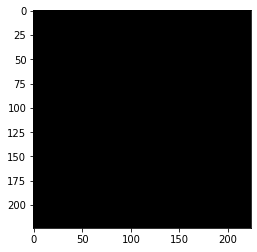

[('nematode, nematode worm, roundworm', 8.22035026550293), ('wing', 6.759390354156494), ('spotlight, spot', 5.051310062408447), ('lighter, light, igniter, ignitor', 4.1363911628723145), ('matchstick', 3.4812629222869873)]
10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


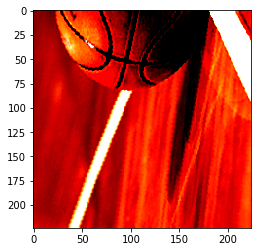

[('basketball', 87.94017791748047), ('harvestman, daddy longlegs, Phalangium opilio', 3.489473819732666), ('coil, spiral, volute, whorl, helix', 0.568606972694397), ('binder, ring-binder', 0.44673439860343933), ('barn spider, Araneus cavaticus', 0.3542083203792572)]
11


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


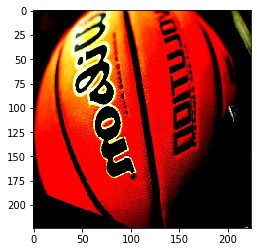

[('basketball', 99.13471221923828), ('bottlecap', 0.4947764277458191), ('rugby ball', 0.23704227805137634), ('puck, hockey puck', 0.048693954944610596), ('punching bag, punch bag, punching ball, punchball', 0.029544802382588387)]
12


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


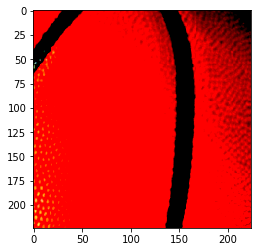

[('basketball', 91.19221496582031), ('bolo tie, bolo, bola tie, bola', 1.3390779495239258), ('mailbag, postbag', 0.9430327415466309), ('purse', 0.5214745402336121), ('racket, racquet', 0.33918240666389465)]
13


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


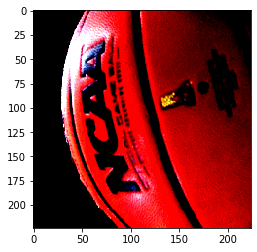

[('basketball', 72.56391906738281), ('parking meter', 14.251640319824219), ('rugby ball', 5.210038185119629), ('barrel, cask', 1.2003366947174072), ('puck, hockey puck', 0.8729729056358337)]
14


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


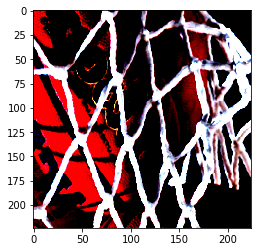

[('chainlink fence', 79.36846923828125), ('paddlewheel, paddle wheel', 1.5331257581710815), ('tray', 1.026918649673462), ('racket, racquet', 0.9585540890693665), ('window screen', 0.9378626942634583)]
15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


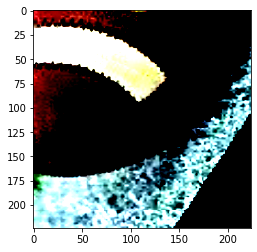

[('buckeye, horse chestnut, conker', 27.419910430908203), ('bolo tie, bolo, bola tie, bola', 6.517673969268799), ('Loafer', 1.8895719051361084), ('shield, buckler', 1.8889834880828857), ('mortar', 1.8278151750564575)]
16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


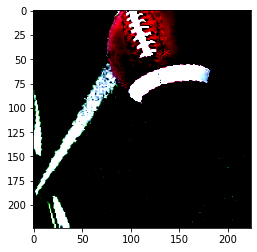

[('football helmet', 25.062715530395508), ('golf ball', 19.13144302368164), ('baseball', 10.695301055908203), ('croquet ball', 6.519684791564941), ('rugby ball', 4.886654853820801)]
17


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


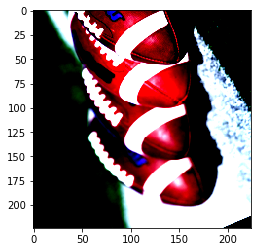

[('tile roof', 14.781713485717773), ('hotdog, hot dog, red hot', 11.37535285949707), ('Band Aid', 5.719040870666504), ('banded gecko', 4.942299842834473), ('abacus', 4.914597511291504)]
18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


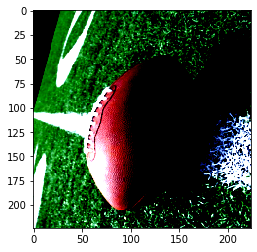

[('golf ball', 31.446874618530273), ('croquet ball', 17.924503326416016), ('rugby ball', 14.983510971069336), ('basketball', 10.916435241699219), ('ping-pong ball', 3.2724266052246094)]
19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


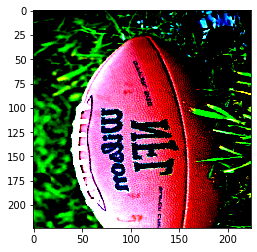

[('rugby ball', 92.05249786376953), ('basketball', 7.761239051818848), ('baseball', 0.05429520457983017), ('bottlecap', 0.04194900020956993), ('football helmet', 0.020306792110204697)]
20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


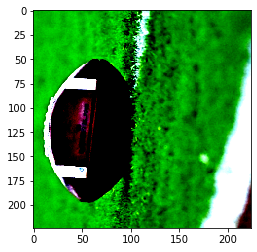

[('leafhopper', 9.623128890991211), ('rugby ball', 8.816702842712402), ('canoe', 6.663265228271484), ('cello, violoncello', 6.105564117431641), ('leaf beetle, chrysomelid', 4.014811992645264)]
21


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


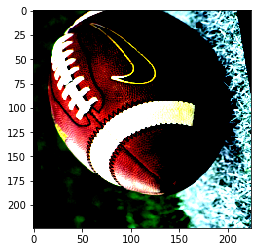

[('rugby ball', 43.24180603027344), ('basketball', 28.363862991333008), ('baseball', 27.73282814025879), ('maraca', 0.22353041172027588), ('soccer ball', 0.17505642771720886)]
22


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


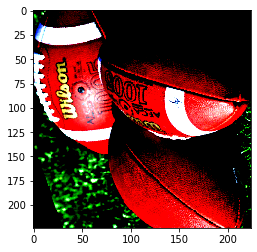

[('basketball', 71.37757873535156), ('rugby ball', 12.022599220275879), ('cowboy hat, ten-gallon hat', 2.313612937927246), ('soccer ball', 1.6277587413787842), ('Loafer', 1.6215115785598755)]
23


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


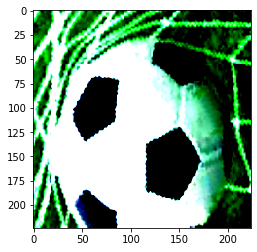

[('soccer ball', 94.72862243652344), ('giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca', 1.186680793762207), ('Newfoundland, Newfoundland dog', 1.088768482208252), ('toy terrier', 0.767707347869873), ('Walker hound, Walker foxhound', 0.28095749020576477)]
24


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


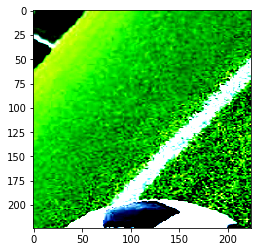

[('football helmet', 13.868353843688965), ('soccer ball', 7.234410762786865), ('Great Dane', 5.942626476287842), ('golf ball', 5.049269676208496), ('ballplayer, baseball player', 3.5694680213928223)]
25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


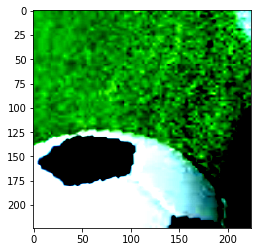

[('golf ball', 15.540656089782715), ('Japanese spaniel', 13.680643081665039), ('standard poodle', 12.525792121887207), ('soccer ball', 5.621339797973633), ('Sealyham terrier, Sealyham', 3.74753999710083)]
26


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


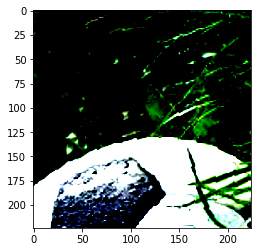

[('stinkhorn, carrion fungus', 39.3472785949707), ('earthstar', 14.924918174743652), ('golf ball', 9.720752716064453), ('soccer ball', 3.6512560844421387), ('mushroom', 2.9001035690307617)]
27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


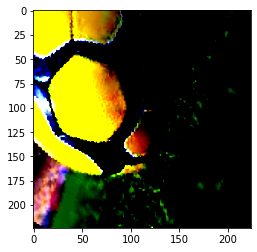

[('rock beauty, Holocanthus tricolor', 22.94162940979004), ('long-horned beetle, longicorn, longicorn beetle', 13.513416290283203), ('pinwheel', 11.169251441955566), ('sea slug, nudibranch', 11.021705627441406), ('golf ball', 5.6792802810668945)]
28


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


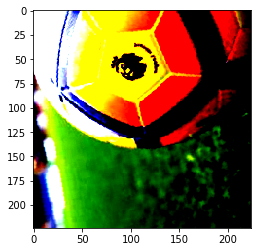

[('football helmet', 36.503936767578125), ('crash helmet', 22.355709075927734), ('volleyball', 6.847814559936523), ('parking meter', 5.16079044342041), ('rugby ball', 2.4216620922088623)]
29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


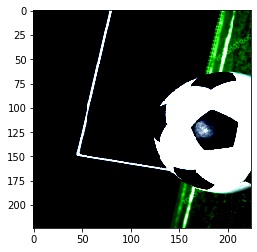

[('soccer ball', 69.47842407226562), ('iPod', 3.7052524089813232), ('racket, racquet', 1.9778540134429932), ('knee pad', 1.7230974435806274), ('grille, radiator grille', 1.42829430103302)]
30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


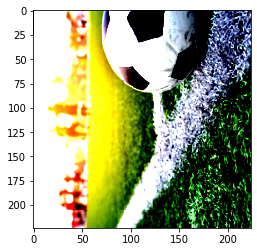

[('soccer ball', 43.335723876953125), ('golf ball', 14.402647018432617), ('rugby ball', 9.211699485778809), ('football helmet', 8.718551635742188), ('volleyball', 1.201677918434143)]
31


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


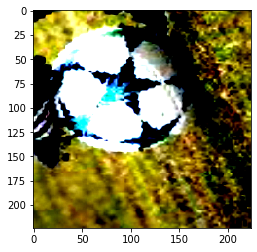

[('soccer ball', 12.858774185180664), ('black grouse', 12.00802230834961), ('standard poodle', 3.7873001098632812), ('muzzle', 3.417041778564453), ('wire-haired fox terrier', 2.918588161468506)]


In [418]:
for i, (images, labels) in enumerate (data):
    print(i)
    plt.figure()
    plt.imshow(np.transpose(images));
    plt.show()
    image = torch.unsqueeze(images, 0) #
    out = model(image)
    pro, indices = torch.sort(out, descending=True)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    print([(classes[idx], percentage[idx].item()) for idx in indices[0][:5]])

# resnet101 model:

In [419]:
#load the model2
model2 = models.resnet101(pretrained=True)
model2.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


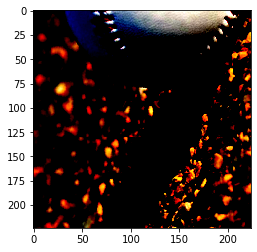

[('baseball', 99.80997467041016), ('ballplayer, baseball player', 0.02732200361788273), ('golf ball', 0.014834868721663952), ('tennis ball', 0.008367883041501045), ('ping-pong ball', 0.007328086066991091)]
1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


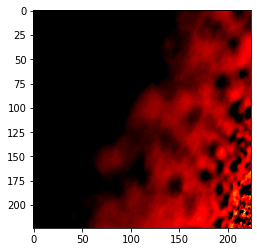

[('golf ball', 23.26381492614746), ('weevil', 9.502957344055176), ('tree frog, tree-frog', 4.758378028869629), ('night snake, Hypsiglena torquata', 4.607915878295898), ('baseball', 3.7712976932525635)]
2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


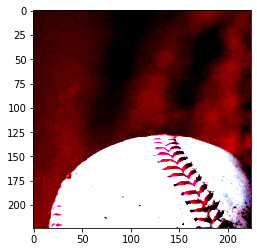

[('baseball', 99.99900817871094), ('ballplayer, baseball player', 0.0008351305150426924), ('golf ball', 4.859795808442868e-05), ('ping-pong ball', 4.0484475903213024e-05), ('tennis ball', 3.513225237838924e-05)]
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


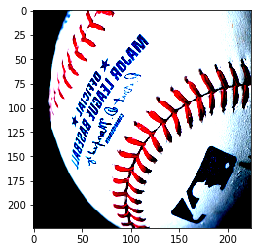

[('baseball', 99.99324035644531), ('rugby ball', 0.004044150933623314), ('ballplayer, baseball player', 0.0022668135352432728), ('golf ball', 0.00011315954907331616), ('soccer ball', 7.08303923602216e-05)]
4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


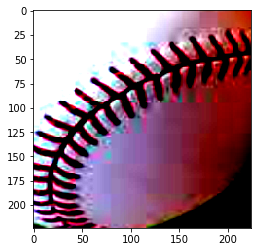

[('baseball', 99.98870086669922), ('ballplayer, baseball player', 0.0047559188678860664), ('golf ball', 0.002607358619570732), ('chambered nautilus, pearly nautilus, nautilus', 0.0009270085720345378), ('partridge', 0.0005192974349483848)]
5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


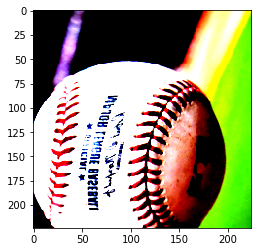

[('baseball', 99.98960876464844), ('ballplayer, baseball player', 0.009245743975043297), ('golf ball', 0.0006515372078865767), ('ping-pong ball', 0.00013954519818071276), ('tennis ball', 0.00013455378939397633)]
6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


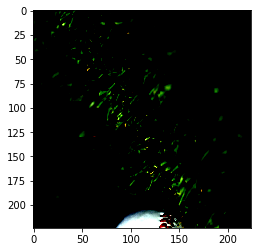

[('baseball', 97.679443359375), ('golf ball', 2.2891480922698975), ('ping-pong ball', 0.01883290894329548), ('croquet ball', 0.0062751127406954765), ('soccer ball', 0.0030130352824926376)]
7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


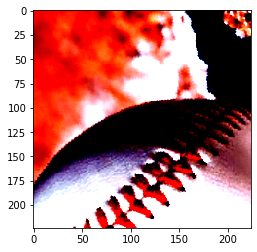

[('baseball', 99.99446868896484), ('ballplayer, baseball player', 0.004223441705107689), ('partridge', 0.00025083450600504875), ('rugby ball', 0.00017201255832333118), ('ruffed grouse, partridge, Bonasa umbellus', 0.000138426898047328)]
8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


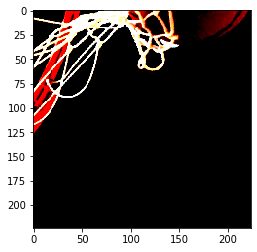

[('basketball', 99.44888305664062), ('knot', 0.24555441737174988), ('violin, fiddle', 0.0811861902475357), ('jellyfish', 0.03292199969291687), ('cello, violoncello', 0.025740815326571465)]
9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


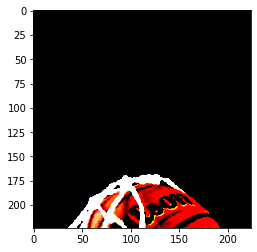

[('basketball', 12.592647552490234), ('mask', 10.015448570251465), ('coil, spiral, volute, whorl, helix', 6.885013580322266), ('tennis ball', 4.334367752075195), ('microphone, mike', 4.274036407470703)]
10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


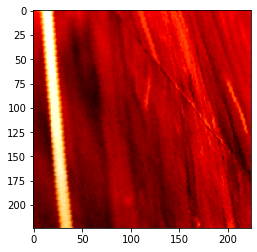

[('acoustic guitar', 16.550891876220703), ('screw', 12.728357315063477), ('pick, plectrum, plectron', 6.702024459838867), ('ping-pong ball', 5.19560432434082), ('cockroach, roach', 4.831287384033203)]
11


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


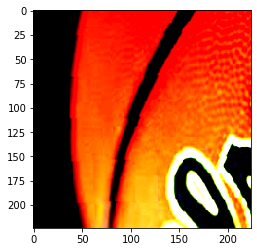

[('basketball', 99.99472045898438), ('rugby ball', 0.004178604576736689), ('football helmet', 0.00040927197551354766), ('volleyball', 0.0002761497744359076), ('soccer ball', 0.0002142508892575279)]
12


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


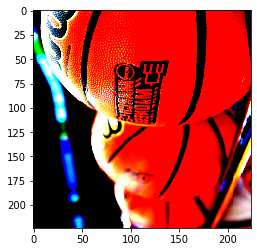

[('basketball', 99.99124908447266), ('volleyball', 0.00403135921806097), ('rugby ball', 0.0034342959988862276), ('ping-pong ball', 0.00046393953380174935), ('baseball', 0.00039690270205028355)]
13


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


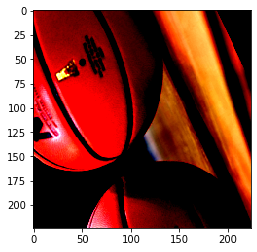

[('basketball', 99.9597396850586), ('rugby ball', 0.03859029710292816), ('volleyball', 0.0009596723248250782), ('CD player', 0.0002303925430169329), ('croquet ball', 8.483535930281505e-05)]
14


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


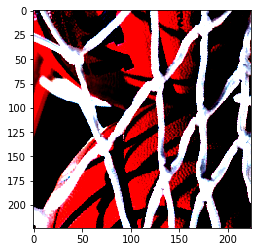

[('basketball', 68.4378890991211), ('baseball', 10.642465591430664), ('chainlink fence', 5.399236679077148), ('running shoe', 4.069863796234131), ('football helmet', 3.2404794692993164)]
15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


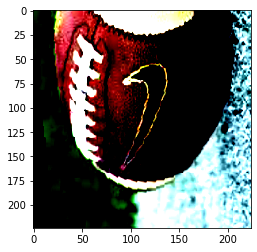

[('baseball', 72.95372009277344), ('rugby ball', 25.212419509887695), ('maraca', 0.47559797763824463), ('tennis ball', 0.466343492269516), ('soccer ball', 0.3504265248775482)]
16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


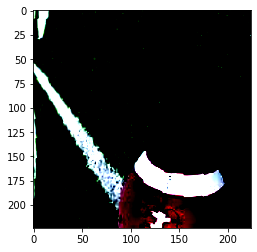

[('croquet ball', 27.65602684020996), ('rugby ball', 26.66697120666504), ('airship, dirigible', 18.211551666259766), ('soccer ball', 5.792160511016846), ('football helmet', 5.707530498504639)]
17


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


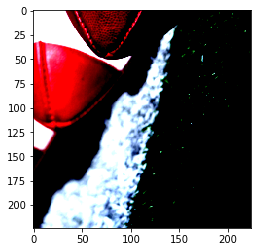

[('Loafer', 95.13079833984375), ('running shoe', 2.820019483566284), ('rugby ball', 1.1528997421264648), ('sandal', 0.19042275846004486), ('soccer ball', 0.17729119956493378)]
18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


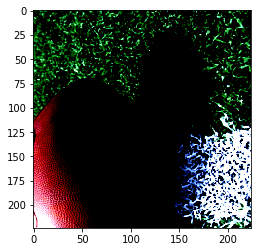

[('rugby ball', 56.75742721557617), ('basketball', 43.060340881347656), ('croquet ball', 0.06460926681756973), ('football helmet', 0.031645938754081726), ('soccer ball', 0.030386997386813164)]
19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


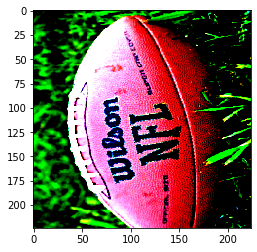

[('rugby ball', 99.91956329345703), ('basketball', 0.061875808984041214), ('soccer ball', 0.013062813319265842), ('volleyball', 0.0031265888828784227), ('baseball', 0.0021474186796694994)]
20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


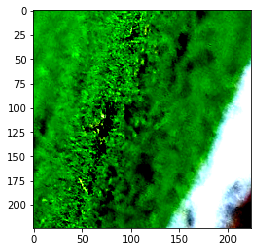

[('hare', 24.136030197143555), ('robin, American robin, Turdus migratorius', 5.376944541931152), ('partridge', 4.314820289611816), ('golf ball', 3.6391143798828125), ('red fox, Vulpes vulpes', 3.3889994621276855)]
21


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


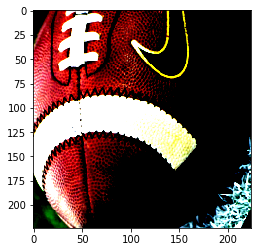

[('basketball', 75.6606216430664), ('rugby ball', 23.839387893676758), ('volleyball', 0.2770625650882721), ('soccer ball', 0.09857136756181717), ('football helmet', 0.05387323349714279)]
22


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


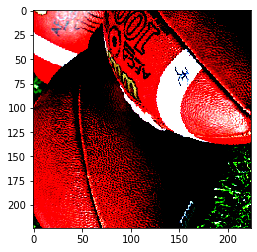

[('rugby ball', 54.60493087768555), ('basketball', 43.74543380737305), ('baseball', 0.7543720006942749), ('soccer ball', 0.4945409893989563), ('volleyball', 0.25531914830207825)]
23


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


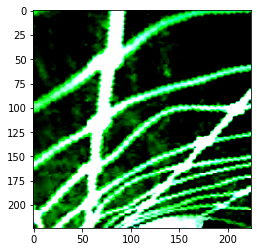

[('barn spider, Araneus cavaticus', 29.536619186401367), ("spider web, spider's web", 16.329118728637695), ('black and gold garden spider, Argiope aurantia', 10.949956893920898), ('velvet', 7.078196048736572), ('soccer ball', 6.113319396972656)]
24


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


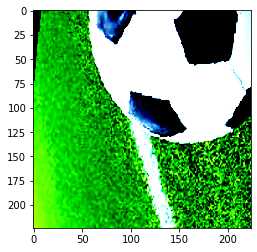

[('soccer ball', 99.9902572631836), ('golf ball', 0.0067220344208180904), ('volleyball', 0.00042470102198421955), ('croquet ball', 0.00022443459602072835), ('tennis ball', 0.00018759744125418365)]
25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


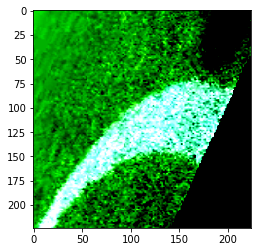

[('golf ball', 21.145652770996094), ('ballplayer, baseball player', 8.259737014770508), ('baseball', 5.174495697021484), ('tennis ball', 4.080557346343994), ('maze, labyrinth', 3.4198687076568604)]
26


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


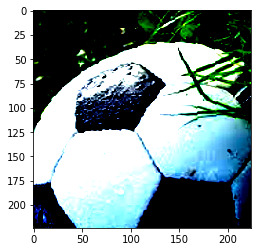

[('soccer ball', 99.99984741210938), ('volleyball', 6.322387343971059e-05), ('golf ball', 5.954725565970875e-05), ('giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca', 6.839067737018922e-06), ('earthstar', 6.318085524981143e-06)]
27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


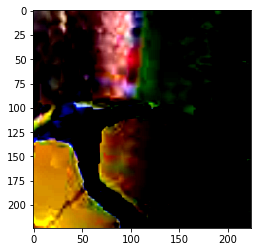

[('soccer ball', 99.97608184814453), ('golf ball', 0.006241200026124716), ('volleyball', 0.004901348613202572), ('baseball', 0.0033698303159326315), ('rugby ball', 0.002676387783139944)]
28


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


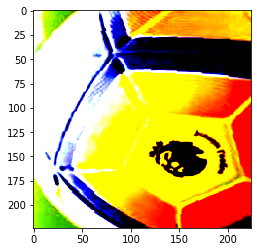

[('soccer ball', 99.8934326171875), ('volleyball', 0.10641476511955261), ('rugby ball', 6.593031866941601e-05), ('basketball', 3.821139762294479e-05), ('tennis ball', 7.661522431590129e-06)]
29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


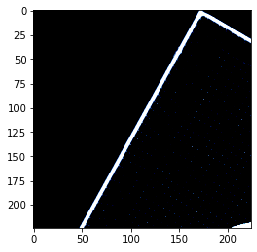

[('loudspeaker, speaker, speaker unit, loudspeaker system, speaker system', 19.354421615600586), ('strainer', 12.667150497436523), ('microphone, mike', 5.5604729652404785), ('space heater', 5.307452201843262), ("spider web, spider's web", 3.0373616218566895)]
30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


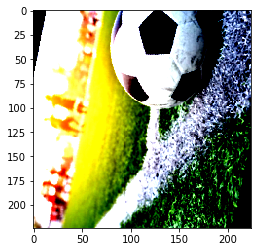

[('soccer ball', 99.9100341796875), ('golf ball', 0.0370771698653698), ('rugby ball', 0.0044237407855689526), ('volleyball', 0.0027626045048236847), ('baseball', 0.001956729916855693)]
31


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


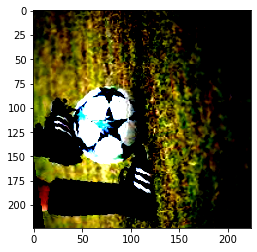

[('soccer ball', 99.70976257324219), ('rugby ball', 0.09008442610502243), ('golf ball', 0.059483084827661514), ('volleyball', 0.03740653023123741), ('baseball', 0.02084668166935444)]


In [421]:
for i, (images, labels) in enumerate (data):
    print(i)
    plt.figure()
    plt.imshow(np.transpose(images));
    plt.show()
    image = torch.unsqueeze(images, 0) #
    out = model2(image)
    pro, indices = torch.sort(out, descending=True)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    print([(classes[idx], percentage[idx].item()) for idx in indices[0][:5]])

In [422]:
with open('imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]

In [423]:
#find the accuracy and compare between them:
model1_acc=0
model2_acc=0
for i, (images, labels) in enumerate (data):
    image = torch.unsqueeze(images, 0) #
    out1 = model(image)
    pro, indices1 = torch.sort(out1, descending=True)
    name=classes[indices1[0][:1]]
    print("model1:",name)
    if name == 'ball':
        model1_acc +=1
    out2 = model2(image)
    pro, indices2 = torch.sort(out2, descending=True)
    name2=classes[indices2[0][:1]]
    print("model2:",name2)
    if name2 == 'ball':
        model2_acc +=1
print ('Alexnet model:',model1_acc/(i+1))
print ('resnet101 model:',model2_acc/(i+1))

model1: honeycomb
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: matchstick
model2: knot
model1: lycaenid, lycaenid butterfly
model2: jellyfish
model1: wooden spoon
model2: screw
model1: combination lock
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: leafhopper
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: stinkhorn, carrion fungus
model2: ball
model1: rock beauty, Holocanthus tricolor
model2: ball
model1: bird
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
model1: ball
model2: ball
Alexnet model: 0.71875
resnet101 model: 0.90625


In [388]:
model1_acc,i

(21, 31)

In [426]:
#test model with external images:
data_dir = 'images/test'
img_transform = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
data = datasets.ImageFolder(data_dir , transform=img_transform)

0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


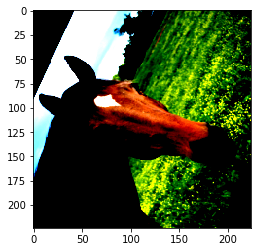

[('sorrel', 80.97631072998047)]
1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


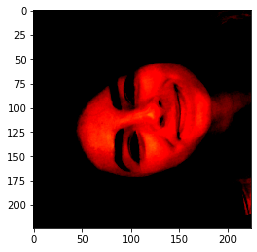

[('candle, taper, wax light', 13.980449676513672)]
2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


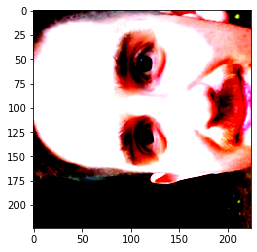

[('ice lolly, lolly, lollipop, popsicle', 12.55480670928955)]
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


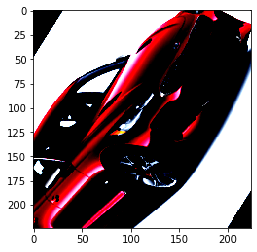

[('sports car, sport car', 87.835205078125)]
4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


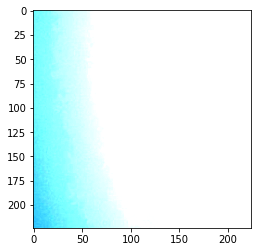

[('wing', 11.556727409362793)]
5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


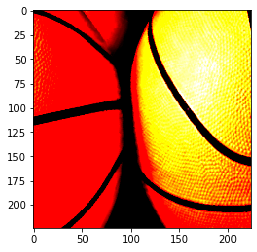

[('ball', 99.99989318847656)]
6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


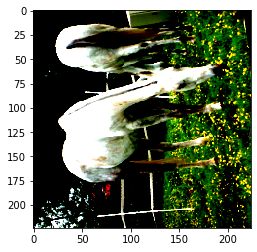

[('gazelle', 50.393836975097656)]
7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


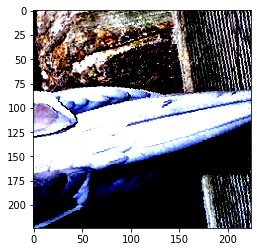

[('African grey, African gray, Psittacus erithacus', 85.93833923339844)]
8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


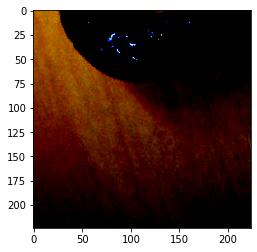

[('slug', 79.09681701660156)]
9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


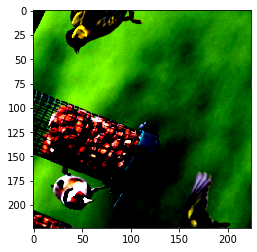

[('goldfinch, Carduelis carduelis', 52.556854248046875)]
10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


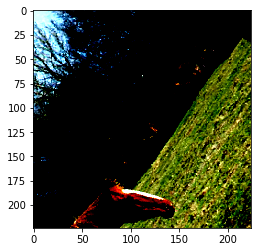

[('sorrel', 81.65687561035156)]
11


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


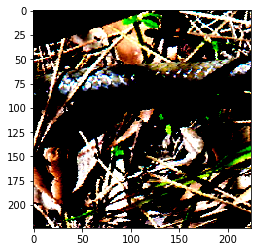

[('water snake', 30.51491355895996)]
12


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


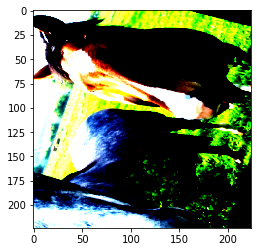

[('sorrel', 69.64161682128906)]
13


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


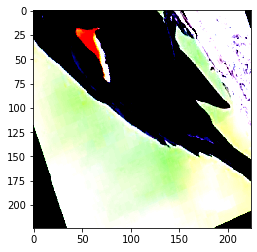

[('bird', 41.38905715942383)]
14


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


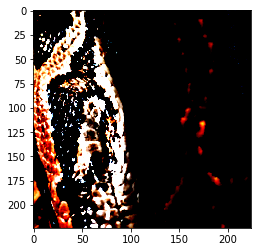

[('rock python, rock snake, Python sebae', 51.27455139160156)]
15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


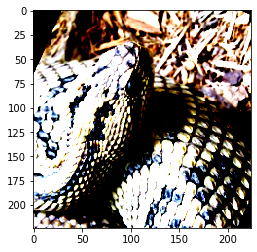

[('hognose snake, puff adder, sand viper', 30.907926559448242)]
16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


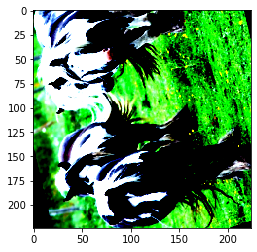

[('zebra', 25.861618041992188)]
17


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


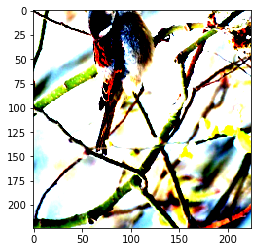

[('junco, snowbird', 38.10425567626953)]
18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


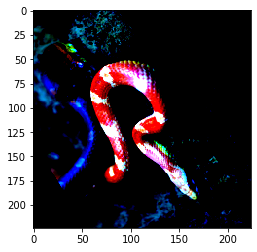

[('night snake, Hypsiglena torquata', 55.3570442199707)]
19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


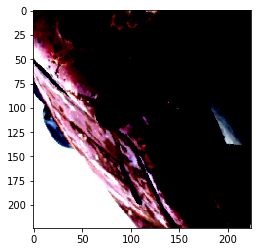

[('racer, race car, racing car', 39.71608352661133)]
20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


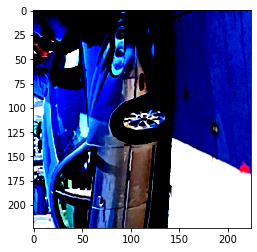

[('sports car, sport car', 79.30992126464844)]
21


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


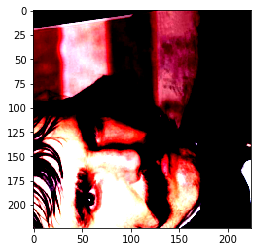

[('electric guitar', 10.856606483459473)]
22


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


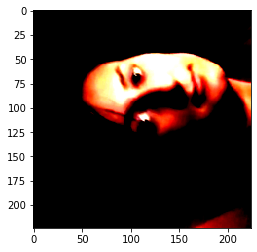

[('brassiere, bra, bandeau', 24.17145538330078)]
23


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


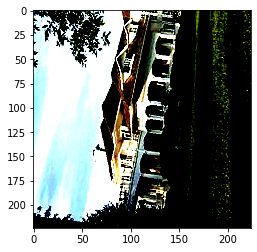

[('palace', 71.79161834716797)]
24


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


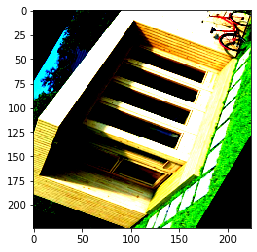

[('picket fence, paling', 28.08143424987793)]
25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


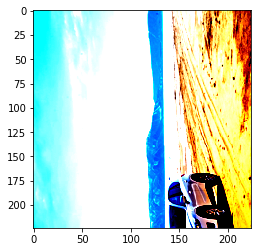

[('seashore, coast, seacoast, sea-coast', 27.240123748779297)]
26


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


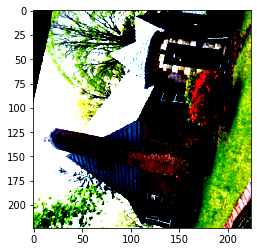

[('bell cote, bell cot', 47.63916015625)]
27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


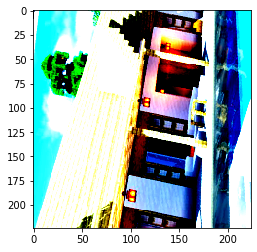

[('patio, terrace', 35.19171905517578)]
28


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


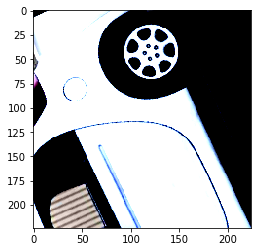

[('sports car, sport car', 37.63747787475586)]
29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


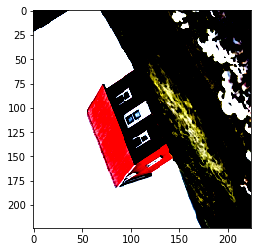

[('bell cote, bell cot', 63.5758056640625)]
30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


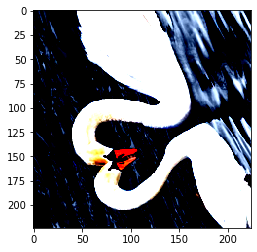

[('goose', 61.70325469970703)]


In [428]:
for i, (images, labels) in enumerate (data):
    print(i)
    plt.figure()
    plt.imshow(np.transpose(images));
    plt.show()
    image = torch.unsqueeze(images, 0) #
    out = model2(image)
    pro, indices = torch.sort(out, descending=True)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    print([(classes[idx], percentage[idx].item()) for idx in indices[0][:1]])

In [424]:
#Extra:
#make function to read and predict any image:
def imgshow(file):
    img=Image.open(file)
    plt.figure()
    plt.imshow(np.asarray(img));
    plt.show()
    img_t = transform(img)
    image = torch.unsqueeze(img_t, 0) #
    out = model2(image)
    pro, indices = torch.sort(out, descending=True)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    print([(classes[idx], percentage[idx].item()) for idx in indices[0][:1]])


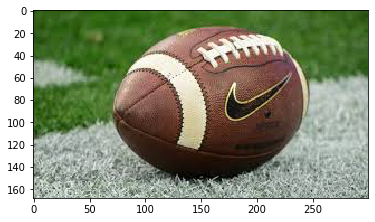

[('ball', 82.88329315185547)]


In [425]:
imgshow("extra.jpg")